In [1]:
from kSZ_forecast_general_func import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def set_ticks(ax, x, y, x_t, y_t, ):
    
    f = interpolate.interp1d(x, np.arange(len(x)))
    
    ax.set_xticks(list(f(x_t)))
    ax.set_xticklabels(["%.2f" % number for number in x_t])

    f = interpolate.interp1d(y, np.arange(len(y)))
    ax.set_yticks(list(f(y_t)))
    ax.set_yticklabels(["%.2f" % number for number in y_t])




# 3D radius

In [2]:
redshift =np.linspace(0.1,2.4,50)
mass = 10**np.linspace(11, 14.5, 60)
radius = np.zeros((len(redshift), len(mass)))
for i in range(len(redshift)):
    for j in range(len(mass)):
        conc = concentration.concentration(mass[j], 'vir', redshift[i], model = 'bullock01')
        profile = profile_nfw.NFWProfile(M = mass[j], mdef = '200m', z = redshift[i], c = conc)
        radius[i, j] = profile.RDelta(redshift[i], '200m')/h/1000  #physical Mpc
        

Text(0.5, 1.0, '$R_{200m}$ [cMpc/h]')

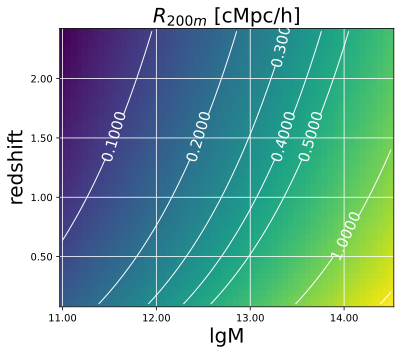

In [7]:
fig, ax = plt.subplots(figsize = (6,7))
ax.imshow(np.log10(radius), origin="lower")
#plt.colorbar()
set_ticks(ax, np.log10(mass), redshift, [11, 12, 13, 14], [ 0.5, 1, 1.5, 2])

level=[0.1,0.2, 0.3, 0.4, 0.5, 1, 2]

CS2=ax.contour((radius),level,colors="w",linewidths=1)
fmt = ticker.ScalarFormatter(["1","2","5","20"])
fmt.create_dummy_axis()
ax.clabel(CS2,fmt='%.4f',fontsize = 15)

ax.set_xlabel("lgM", fontsize = 20)
ax.set_ylabel("redshift", fontsize = 20)
ax.grid(c="w")
ax.set_title(r"$R_{200m}$ [cMpc/h]", fontsize = 20)

# angular radius

In [5]:
redshift =np.linspace(0.1,2.4,50)
mass = 10**np.linspace(11, 14.5, 60)
theta = np.zeros((len(redshift), len(mass)))
for i in range(len(redshift)):
    for j in range(len(mass)):
        conc = concentration.concentration(mass[j], 'vir', redshift[i], model = 'bullock01')
        profile = profile_nfw.NFWProfile(M = mass[j], mdef = '200m', z = redshift[i], c = conc)
        R200m = profile.RDelta(redshift[i], '200m')/h/1000  #physical Mpc
        dc = cosmo.comoving_distance(z=redshift[i]).value #Mpc 
        theta[i,j] = R200m*(1+redshift[i])/dc*180*60/np.pi  #physical kpc/h m^2 m^-3

In [23]:
theta

array([[ 1.30429827,  1.3650575 ,  1.42864707, ..., 17.47815466,
        18.29235323, 19.14448082],
       [ 0.89675946,  0.93853393,  0.98225439, ..., 12.01695965,
        12.57675553, 13.16262904],
       [ 0.68680007,  0.71879382,  0.752278  , ...,  9.2034144 ,
         9.63214467, 10.08084642],
       ...,
       [ 0.09492805,  0.09935016,  0.10397827, ...,  1.27207645,
         1.33133462,  1.39335328],
       [ 0.09392342,  0.09829873,  0.10287785, ...,  1.25861388,
         1.31724493,  1.37860721],
       [ 0.0929587 ,  0.09728907,  0.10182117, ...,  1.24568634,
         1.30371515,  1.36444714]])

Text(0.5, 1.0, '$\\theta_{200m}$ [arcmin]')

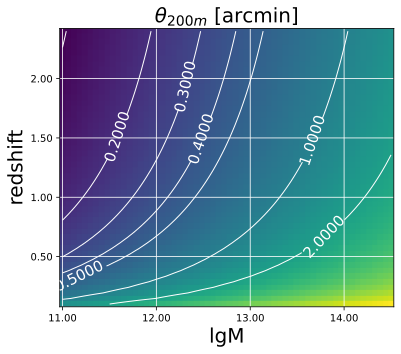

In [6]:
fig, ax = plt.subplots(figsize = (6,7))
ax.imshow(np.log10(theta), origin="lower")
#plt.colorbar()
set_ticks(ax, np.log10(mass), redshift, [11, 12, 13, 14], [ 0.5,1,1.5, 2])

level=[0.1,0.2, 0.3, 0.4, 0.5, 1, 2]

CS2=ax.contour((theta),level,colors="w",linewidths=1)
fmt = ticker.ScalarFormatter(["1","2","5","20"])
fmt.create_dummy_axis()
ax.clabel(CS2,fmt='%.4f',fontsize = 15)

ax.set_xlabel("lgM", fontsize = 20)
ax.set_ylabel("redshift", fontsize = 20)
ax.grid(c="w")
ax.set_title(r"$\theta_{200m}$ [arcmin]", fontsize = 20)

# optical depth


In [4]:
redshift =np.linspace(0,2.4,50)
mass = 10**np.linspace(11, 14.5, 60)
tau = np.zeros((len(redshift), len(mass)))
for i in range(len(redshift)):
    for j in range(len(mass)):
        conc = concentration.concentration(mass[j], 'vir', redshift[i], model = 'bullock01')
        profile = profile_nfw.NFWProfile(M = mass[j], mdef = '200m', z = redshift[i], c = conc)
        R200m = profile.RDelta(redshift[i], '200m')/h  #physical kpc
        tau[i,j] = 400*R200m*sigma_t*(1+redshift[i])**3*ne0*Mpc2m/1000  #physical kpc/h m^2 m^-3

In [9]:
for i in [0, 0.5, 1, 2]:
    
    conc = concentration.concentration(mass[j], 'vir', i, model = 'bullock01')
    profile = profile_nfw.NFWProfile(M = mass[j], mdef = '200m', z = i, c = conc)
    print(profile.RDelta(i, '200m'))

1635.1352328373296
1090.0901935517402
817.5676407643971
545.0450974253665


Text(0.5, 1.0, '$\\tau$')

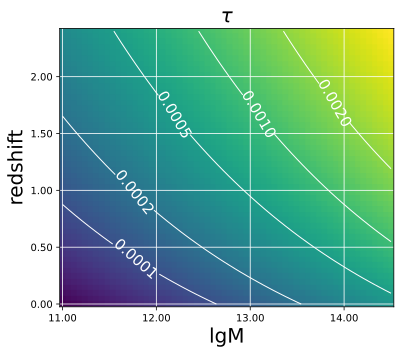

In [5]:
fig, ax = plt.subplots(figsize = (6,7))
ax.imshow(np.log10(tau), origin="lower")
#plt.colorbar()
set_ticks(ax, np.log10(mass), redshift, [11, 12, 13, 14], [0, 0.5,1,1.5, 2])

level=[0.0001,0.0002,0.0005, 0.001,0.002, 0.005, 0.01 ]

CS2=ax.contour((tau),level,colors="w",linewidths=1)
fmt = ticker.ScalarFormatter(["1","2","5","20"])
fmt.create_dummy_axis()
ax.clabel(CS2,fmt='%.4f',fontsize = 15)

ax.set_xlabel("lgM", fontsize = 20)
ax.set_ylabel("redshift", fontsize = 20)
ax.grid(c="w")
ax.set_title(r"$\tau$", fontsize = 20)

# CMB noise

In [8]:
def beam_function(l, theta_beam):
    arcmin2rad =np.pi/180/60
    return np.exp(-l*(l+1)*(theta_beam*arcmin2rad)**2/8/np.log(2))
    return np.exp(-(l*theta_beam*np.pi/180/60)**2/8/np.log(2))
def Cl_noise(theta_beam, sigma_N):
    T_cmb=2.728*10**6
    return (sigma_N*np.pi/60/180/T_cmb)**2

In [9]:
l, cmb_cl = cmbcl()
l = l[100:]
cmb_cl = cmb_cl[100:]

cmb_cl_beam = cmb_cl*beam_function(l, theta_beam=1.26)
noise_cl = np.ones(len(l))*Cl_noise(theta_beam=1.26, sigma_N=11)

ap_l = AP_l(l, the_ap=3)

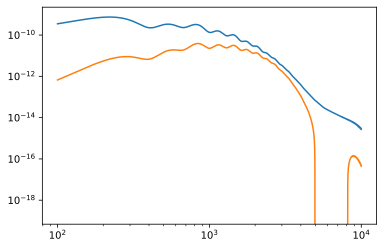

In [10]:
ap_l = AP_l(l, the_ap=3)
plt.plot(l, cmb_cl*l**2/2/np.pi)
plt.plot(l, cmb_cl_beam*l**2/2/np.pi*ap_l)
#plt.plot(l, cln)
#|plt.plot(l, noise_cl*l**2/2/np.pi*ap_l)
plt.xscale("log")
plt.yscale("log")

In [14]:
arcmin2rad=1.0/60/180*np.pi
Delta_T = 11
sigma=1.26
cln=(Delta_T*arcmin2rad/T_cmb)**2*np.exp(l*(l+1)*(sigma*arcmin2rad)**2/8/np.log(2))

In [15]:
for the_ap in range(1, 6):
    ap_l = AP_l(l, the_ap=the_ap)
    print(the_ap, np.sqrt(np.sum(cmb_cl_beam*ap_l*l/2/np.pi*ap_l))*2.728*10**6, np.sqrt(np.sum(noise_cl*ap_l*l/2/np.pi*ap_l))*2.728*10**6)

1 1.1990929553938285 4.849790581575753
2 4.246279646469524 3.480494831786372
3 8.087296154367383 2.6356189632810687
4 11.90545323767523 2.0563923892710263
5 15.31168569540568 1.655605379312368


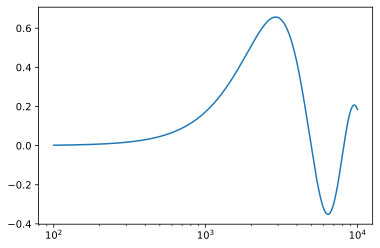

In [78]:
plt.plot(l,ap_l)
plt.xscale("log")

In [72]:
6/(6*np.pi/60/180)

3437.746770784939